Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


from sklearn.linear_model import LogisticRegression
# importing ploting libraries

import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
#Election_Data = pd.read_(r"Election_Data.xlsx", sheet_name = ['Election_Dataset_Two Classes'],index_col=0)
Election_Data = pd.read_csv("Election_Data.csv")

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [3]:
Election_Data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
Election_Data.shape

(1525, 10)

In [5]:
Election_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
Election_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
Election_Data.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [8]:
Election_Data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
Election_Data.vote.value_counts().sort_values()

Conservative     462
Labour          1063
Name: vote, dtype: int64

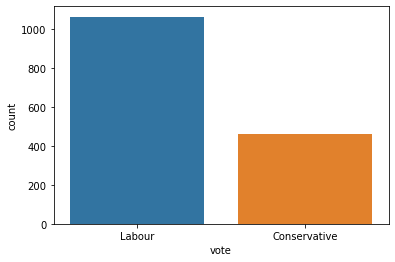

In [10]:
ax = sns.countplot(x="vote", data=Election_Data)

In [11]:
Election_Data.age.value_counts().sort_values()

93     1
91     1
90     1
92     2
87     3
      ..
54    37
47    38
49    39
35    39
37    42
Name: age, Length: 70, dtype: int64

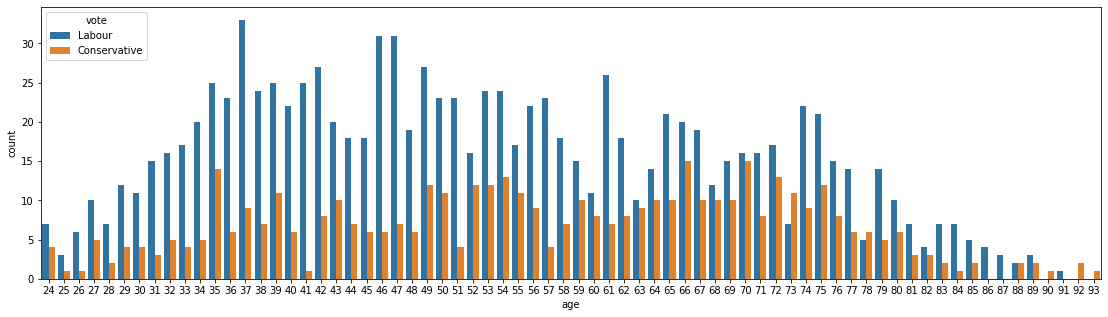

In [12]:
countplot, ax = plt.subplots(figsize = (19,5))
ax =sns.countplot(x = 'age', data=Election_Data,hue="vote")

In [13]:
Election_Data["economic.cond.national"].value_counts().sort_values()

1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64

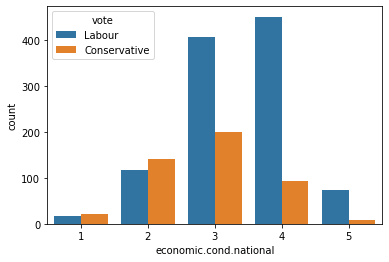

In [14]:
ax = sns.countplot(x="economic.cond.national", hue="vote", data=Election_Data)

In [15]:
Election_Data["economic.cond.household"].value_counts().sort_values()

1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64

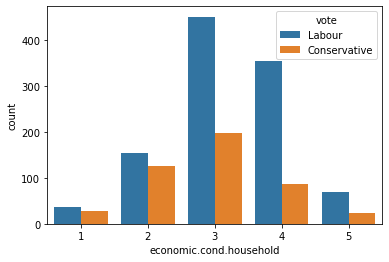

In [16]:
ax = sns.countplot(x="economic.cond.household", hue="vote", data=Election_Data)

In [17]:
Election_Data["Blair"].value_counts().sort_values()

3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64

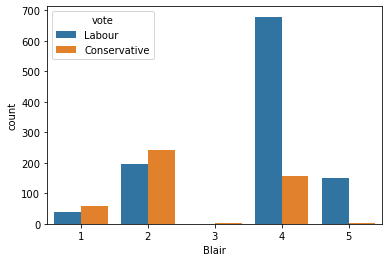

In [18]:
ax = sns.countplot(x="Blair", hue="vote", data=Election_Data)

In [19]:
Election_Data["Hague"].value_counts().sort_values()

3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64

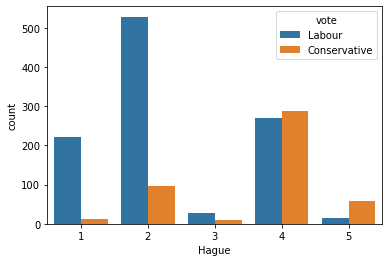

In [20]:
ax = sns.countplot(x="Hague", hue="vote", data=Election_Data)

In [21]:
Election_Data["Europe"].value_counts().sort_values()

2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64

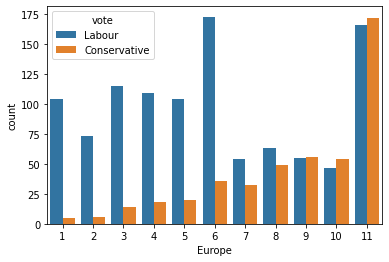

In [22]:
ax = sns.countplot(x="Europe", hue="vote", data=Election_Data)

In [23]:
Election_Data["political.knowledge"].value_counts().sort_values()

1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64

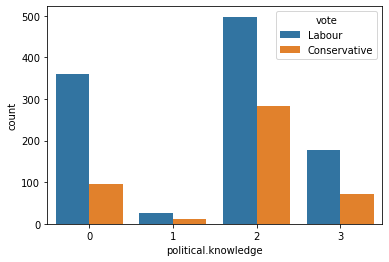

In [24]:
ax = sns.countplot(x="political.knowledge", hue="vote", data=Election_Data)

In [25]:
Election_Data["gender"].value_counts().sort_values()

male      713
female    812
Name: gender, dtype: int64

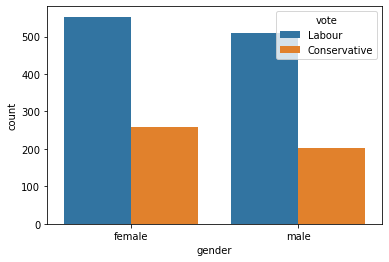

In [26]:
ax = sns.countplot(x="gender", hue="vote", data=Election_Data)

In [27]:
Election_Data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [28]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
Election_Data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [29]:
Election_Data.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [30]:

Election_Data["vote"] = Election_Data["vote"].astype('category')
Election_Data["gender"] = Election_Data["gender"].astype('category')
#df_gem["clarity"] = df_gem["clarity"].astype('category')

Election_Data["vote"] = Election_Data["vote"].cat.codes
Election_Data["gender"] = Election_Data["gender"].cat.codes
#df_gem["clarity"] = df_gem["clarity"].cat.codes

In [31]:
Election_Data.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [32]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(Election_Data[column].describe(),end=' ')
    
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data=Election_Data, x=Election_Data[column], kde=True)
    plt.show()
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Election_Data[column])

    plt.show()

In [33]:
df_num2 = Election_Data.select_dtypes(include = ['float64', 'int64','int8'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

9

Description of vote
----------------------------------------------------------------------------
count    1525.000000
mean        0.697049
std         0.459685
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: vote, dtype: float64 Distribution of vote
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

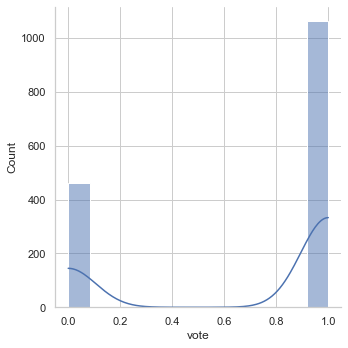

BoxPlot of vote
----------------------------------------------------------------------------


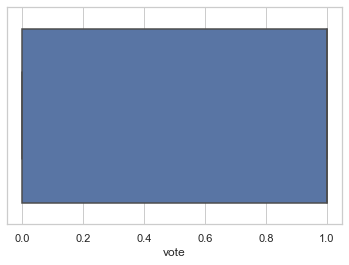

Description of age
----------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

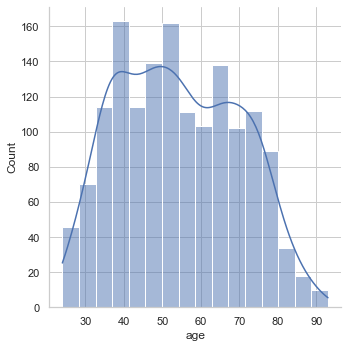

BoxPlot of age
----------------------------------------------------------------------------


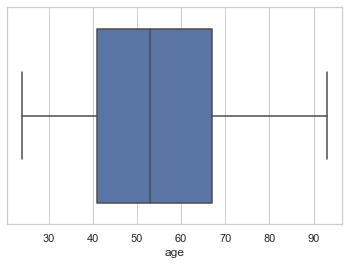

Description of economic.cond.national
----------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Distribution of economic.cond.national
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

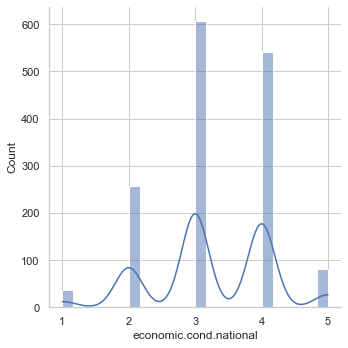

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


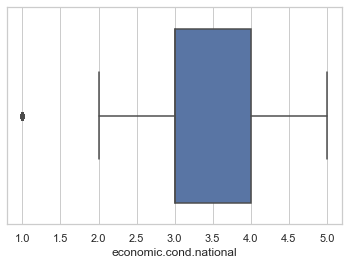

Description of economic.cond.household
----------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Distribution of economic.cond.household
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

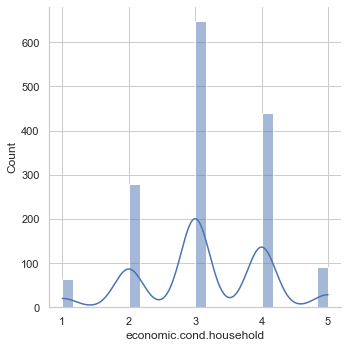

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


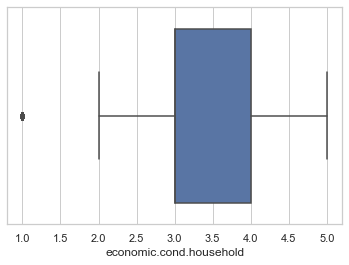

Description of Blair
----------------------------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

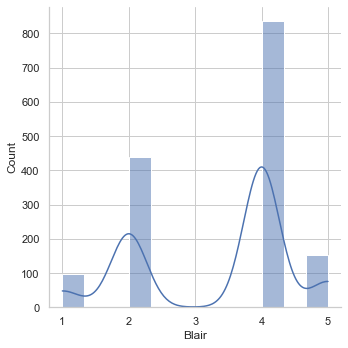

BoxPlot of Blair
----------------------------------------------------------------------------


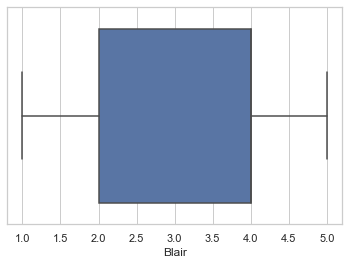

Description of Hague
----------------------------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

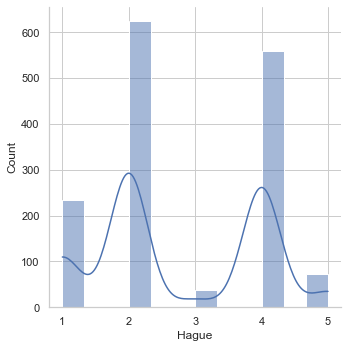

BoxPlot of Hague
----------------------------------------------------------------------------


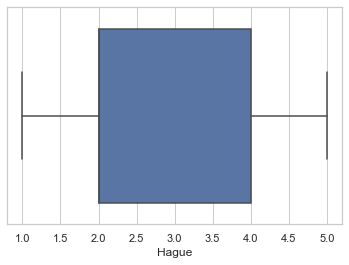

Description of Europe
----------------------------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

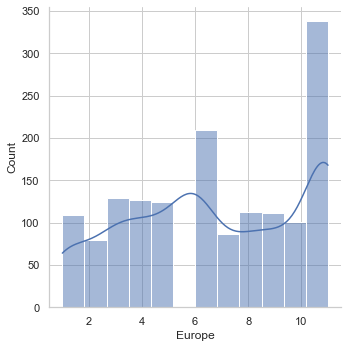

BoxPlot of Europe
----------------------------------------------------------------------------


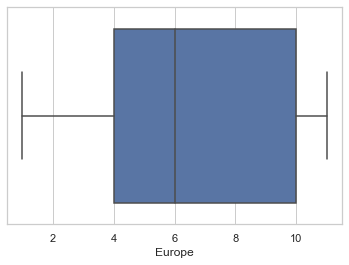

Description of political.knowledge
----------------------------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Distribution of political.knowledge
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

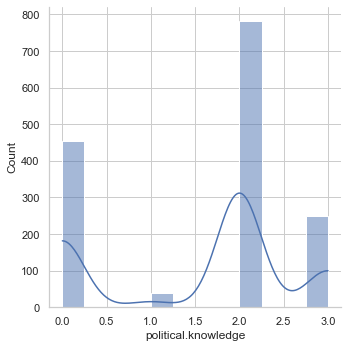

BoxPlot of political.knowledge
----------------------------------------------------------------------------


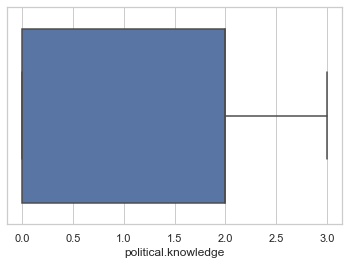

Description of gender
----------------------------------------------------------------------------
count    1525.000000
mean        0.467541
std         0.499109
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64 Distribution of gender
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

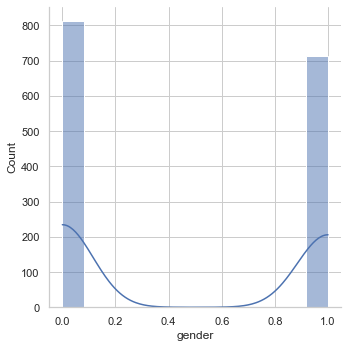

BoxPlot of gender
----------------------------------------------------------------------------


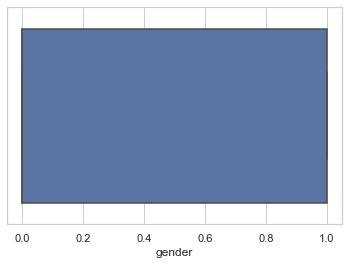

In [34]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

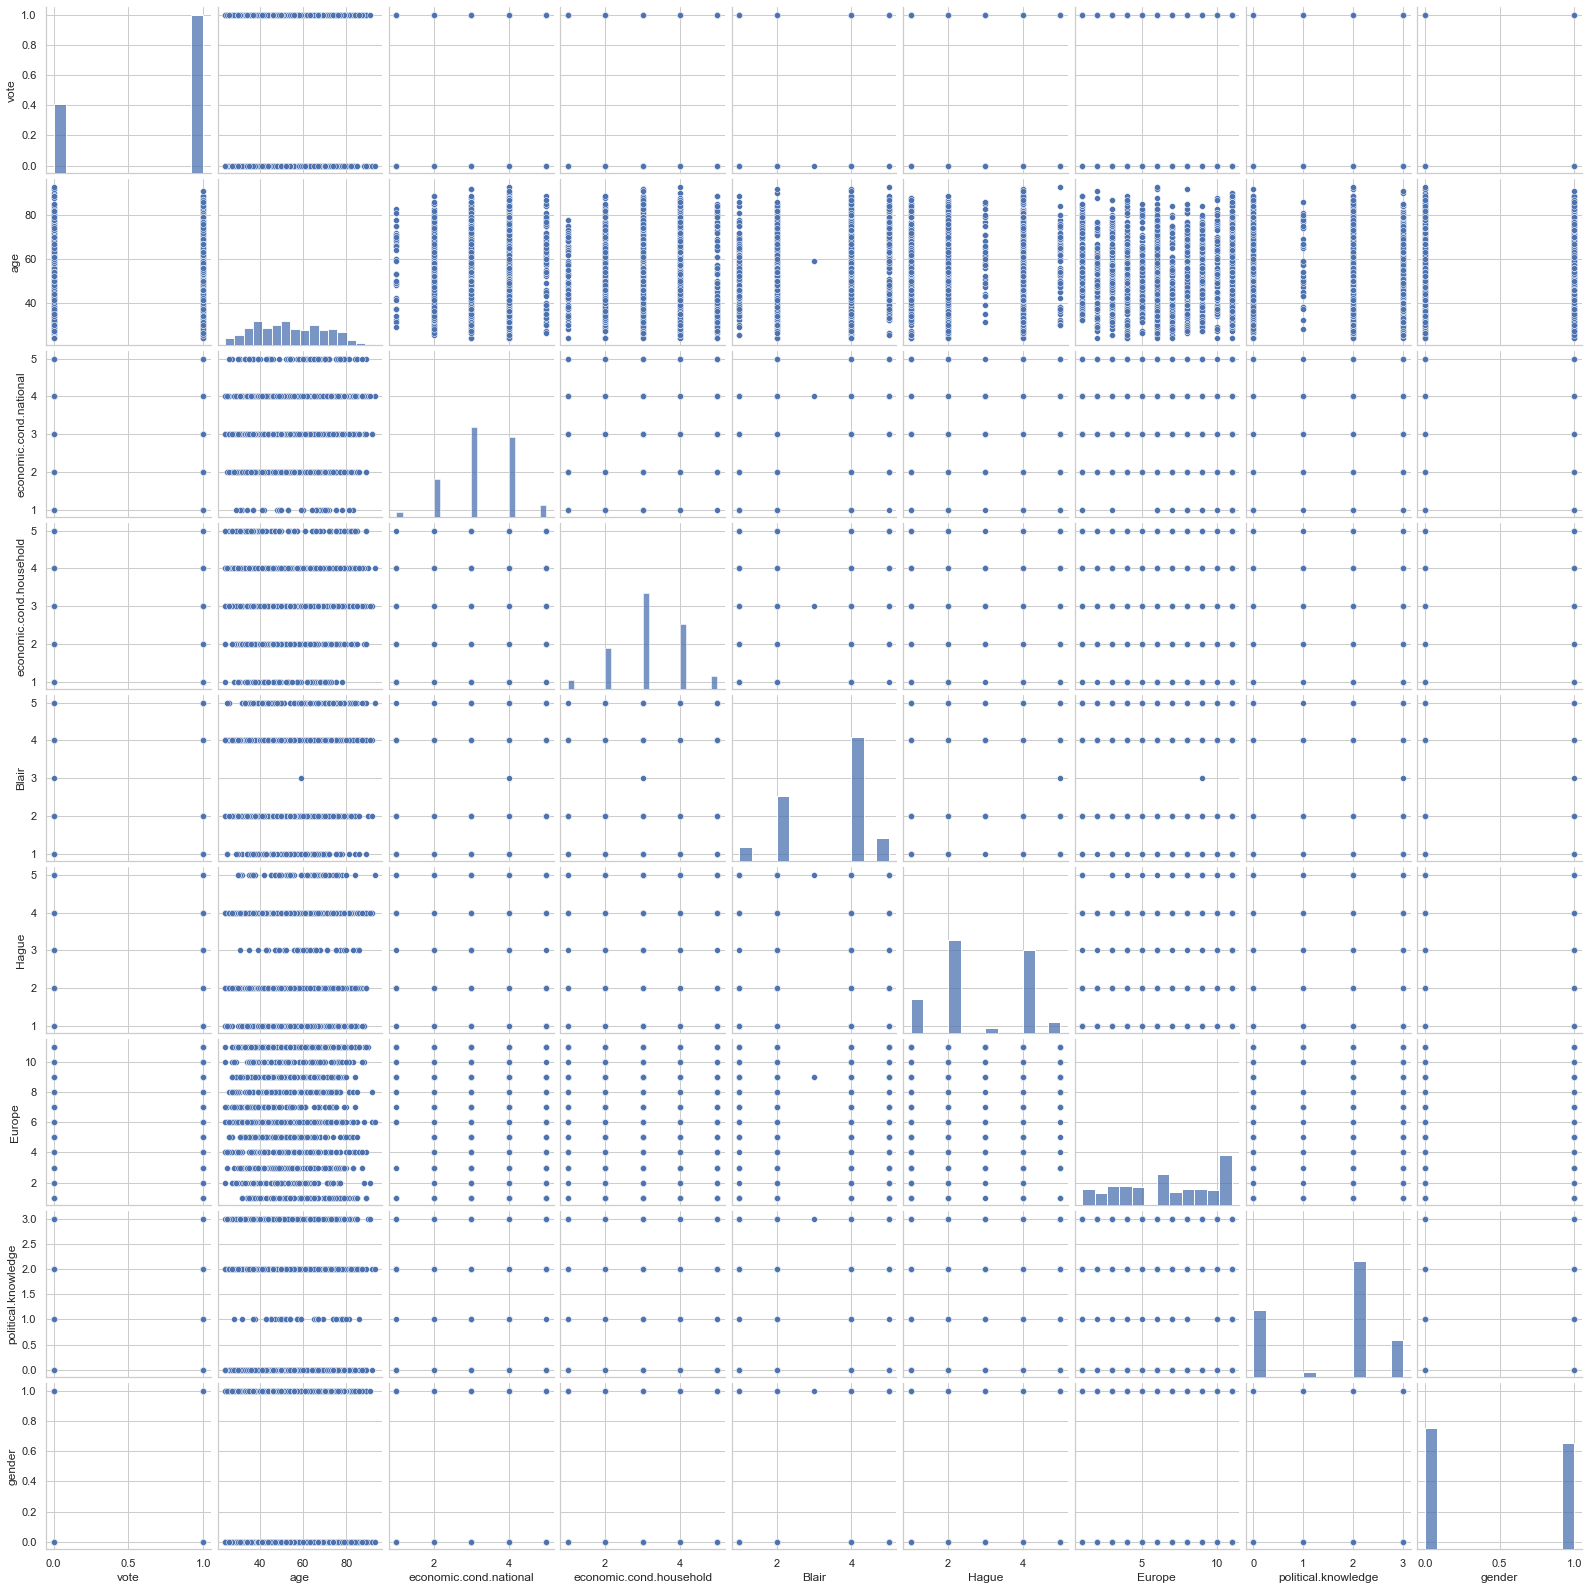

In [35]:
sns.pairplot(Election_Data)
plt.show()

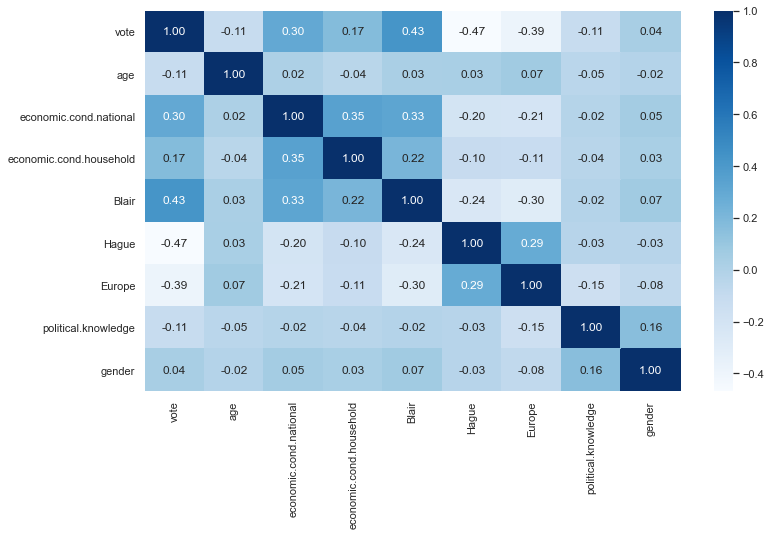

In [36]:
plt.figure(figsize=(12,7))
sns.heatmap(Election_Data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

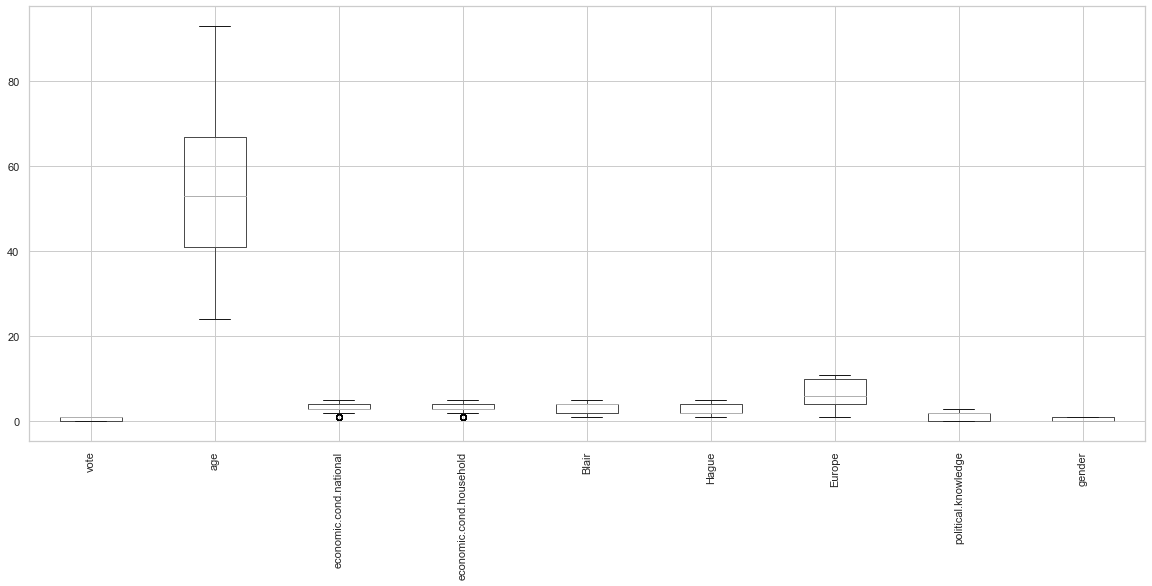

In [37]:
Election_Data.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [38]:
Election_Data.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [39]:
cat1 = ['economic.cond.national','economic.cond.household','Blair','Hague','political.knowledge','gender']
df =pd.get_dummies(Election_Data,columns=cat1,drop_first=True)

In [40]:
df.head()

,vote,age,Europe,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,...,Blair_4,Blair_5,Hague_2,Hague_3,Hague_4,Hague_5,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_1
0,1,43,2,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,36,5,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,1
2,1,35,3,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,1,0,1
3,1,24,4,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,41,6,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
economic.cond.national_2,1525.0,0.168525,0.374454,0.0,0.0,0.0,0.0,1.0
economic.cond.national_3,1525.0,0.398033,0.489653,0.0,0.0,0.0,1.0,1.0
economic.cond.national_4,1525.0,0.355410,0.478794,0.0,0.0,0.0,1.0,1.0
economic.cond.national_5,1525.0,0.053770,0.225638,0.0,0.0,0.0,0.0,1.0
economic.cond.household_2,1525.0,0.183607,0.387290,0.0,0.0,0.0,0.0,1.0
economic.cond.household_3,1525.0,0.424918,0.494493,0.0,0.0,0.0,1.0,1.0
economic.cond.household_4,1525.0,0.288525,0.453225,0.0,0.0,0.0,1.0,1.0


In [42]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [43]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

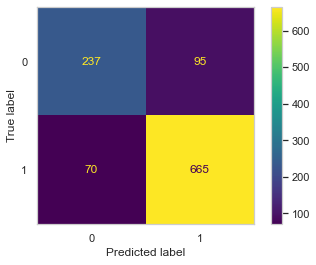

In [45]:
plot_confusion_matrix(LDA_model,X_train,y_train);
plt.grid(False)

In [46]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.845360824742268
[[237  95]
 [ 70 665]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067



AUC: 0.894


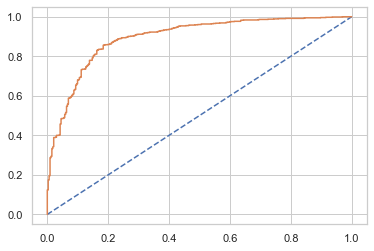

In [47]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

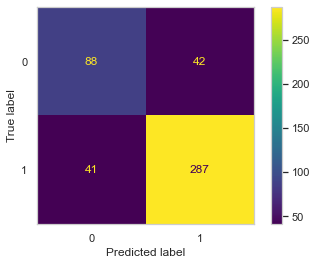

In [48]:
plot_confusion_matrix(LDA_model,X_test,y_test);
plt.grid(False)

In [49]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 88  42]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.894


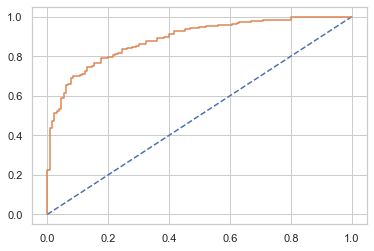

In [50]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


## Logistic Regression

In [51]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [52]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



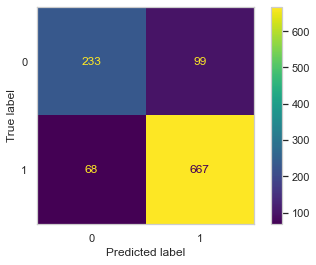

In [54]:
plot_confusion_matrix(model,X_train,y_train);
plt.grid(False)

AUC: 0.900


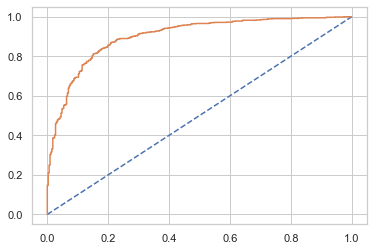

In [55]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [56]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



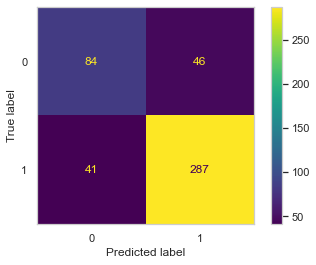

In [57]:
plot_confusion_matrix(model,X_test,y_test);
plt.grid(False)

AUC: 0.900


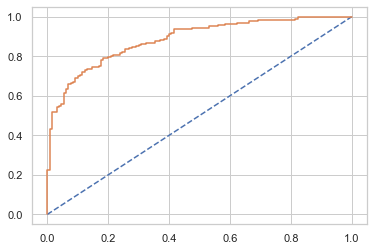

In [58]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [59]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [60]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')


In [61]:
grid_search.fit(X_train, y_train)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [62]:
print(grid_search.best_params_,'\n')

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 



1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

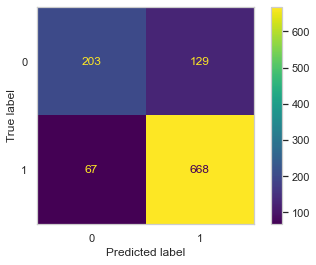

In [64]:
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.grid(False)

In [65]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8163074039362699
[[203 129]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       332
           1       0.84      0.91      0.87       735

    accuracy                           0.82      1067
   macro avg       0.79      0.76      0.77      1067
weighted avg       0.81      0.82      0.81      1067



AUC: 0.875


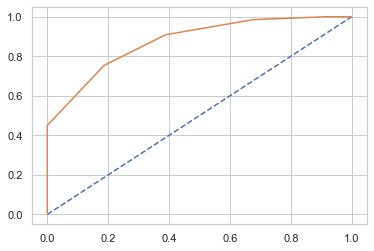

In [66]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [67]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.740174672489083
[[ 72  58]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       130
           1       0.82      0.81      0.82       328

    accuracy                           0.74       458
   macro avg       0.68      0.68      0.68       458
weighted avg       0.74      0.74      0.74       458



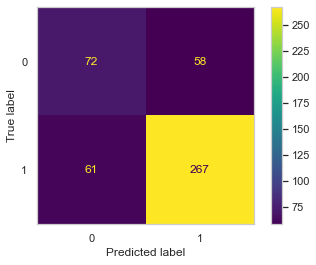

In [68]:
plot_confusion_matrix(KNN_model,X_test,y_test);
plt.grid(False)

AUC: 0.875


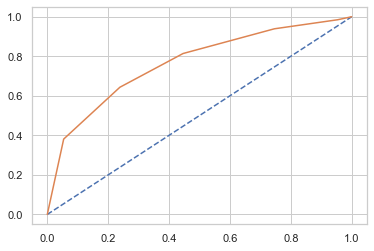

In [69]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [70]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2925764192139738,
 0.27292576419213976,
 0.259825327510917,
 0.2685589519650655,
 0.2620087336244541,
 0.2707423580786026,
 0.2620087336244541,
 0.2685589519650655,
 0.25764192139737996,
 0.2620087336244541]

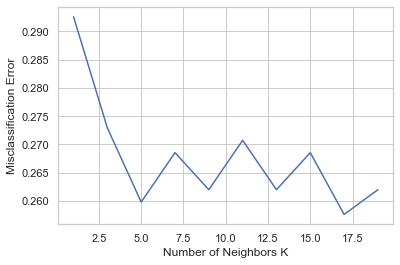

In [71]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=18)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [73]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7685098406747891
[[191 141]
 [106 629]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       332
           1       0.82      0.86      0.84       735

    accuracy                           0.77      1067
   macro avg       0.73      0.72      0.72      1067
weighted avg       0.76      0.77      0.76      1067



In [74]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7270742358078602
[[ 67  63]
 [ 62 266]]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       130
           1       0.81      0.81      0.81       328

    accuracy                           0.73       458
   macro avg       0.66      0.66      0.66       458
weighted avg       0.73      0.73      0.73       458




## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [76]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [77]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.7853795688847235
[[141 191]
 [ 38 697]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       332
           1       0.78      0.95      0.86       735

    accuracy                           0.79      1067
   macro avg       0.79      0.69      0.71      1067
weighted avg       0.79      0.79      0.76      1067



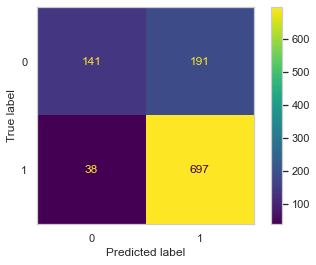

In [78]:
plot_confusion_matrix(NB_model,X_train,y_train);
plt.grid(False)

AUC: 0.854


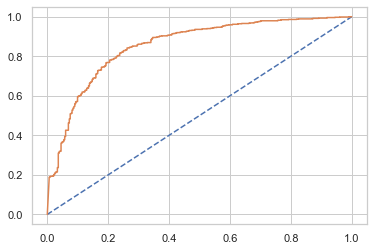

In [79]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [80]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[ 62  68]
 [ 21 307]]
              precision    recall  f1-score   support

           0       0.75      0.48      0.58       130
           1       0.82      0.94      0.87       328

    accuracy                           0.81       458
   macro avg       0.78      0.71      0.73       458
weighted avg       0.80      0.81      0.79       458



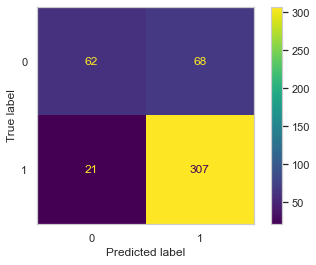

In [81]:
plot_confusion_matrix(NB_model,X_test,y_test);
plt.grid(False)

AUC: 0.854


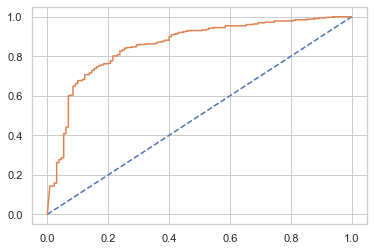

In [82]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [83]:
from imblearn.over_sampling import SMOTE


In [84]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [85]:
y_train.value_counts()

1    735
0    332
Name: vote, dtype: int64

In [86]:
y_train_res.value_counts()

0    735
1    735
Name: vote, dtype: int64

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [88]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [89]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8006802721088435
[[548 187]
 [106 629]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       735
           1       0.77      0.86      0.81       735

    accuracy                           0.80      1470
   macro avg       0.80      0.80      0.80      1470
weighted avg       0.80      0.80      0.80      1470



In [90]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7707423580786026
[[ 91  39]
 [ 66 262]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       130
           1       0.87      0.80      0.83       328

    accuracy                           0.77       458
   macro avg       0.73      0.75      0.73       458
weighted avg       0.79      0.77      0.78       458



1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [91]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [92]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



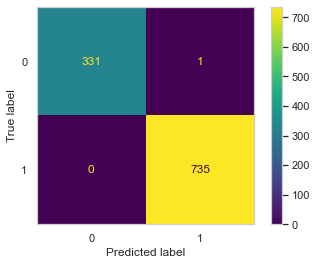

In [93]:
plot_confusion_matrix(RF_model,X_train,y_train);
plt.grid(False)

AUC: 1.000


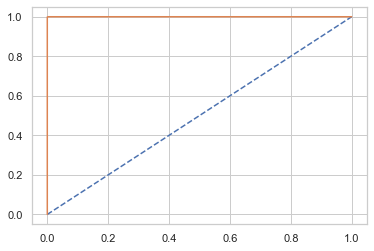

In [94]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [95]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 90  40]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       130
           1       0.88      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



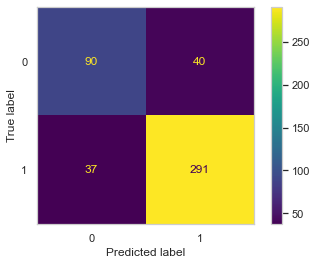

In [96]:
plot_confusion_matrix(RF_model,X_test,y_test);
plt.grid(False)

AUC: 1.000


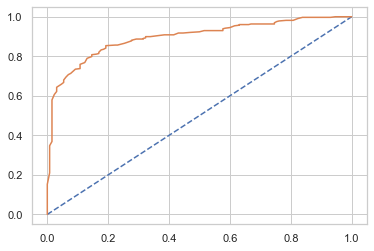

In [97]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [99]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



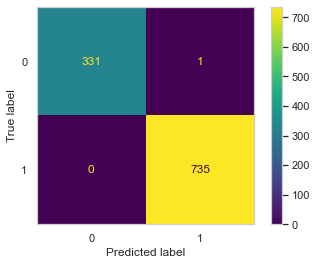

In [100]:
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.grid(False)

AUC: 1.000


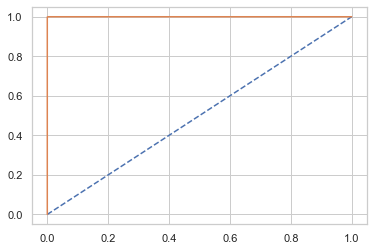

In [101]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [102]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 94  36]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



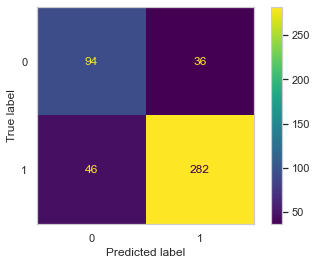

In [103]:
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.grid(False)

AUC: 1.000


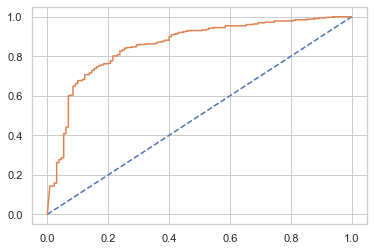

In [104]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [106]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8847235238987816
[[259  73]
 [ 50 685]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       332
           1       0.90      0.93      0.92       735

    accuracy                           0.88      1067
   macro avg       0.87      0.86      0.86      1067
weighted avg       0.88      0.88      0.88      1067



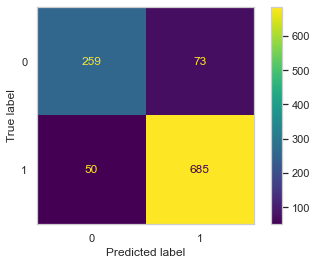

In [107]:
plot_confusion_matrix(gbcl,X_train,y_train);
plt.grid(False)

AUC: 0.949


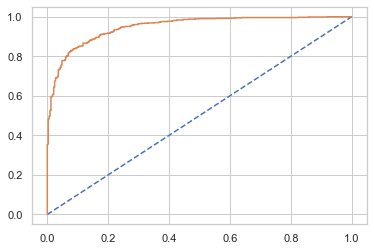

In [108]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [109]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8165938864628821
[[ 94  36]
 [ 48 280]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       130
           1       0.89      0.85      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



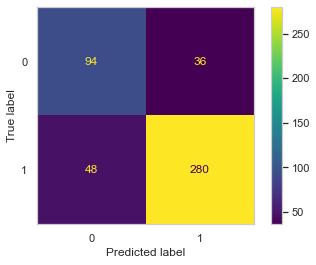

In [110]:
plot_confusion_matrix(gbcl,X_test,y_test);
plt.grid(False)

AUC: 0.949


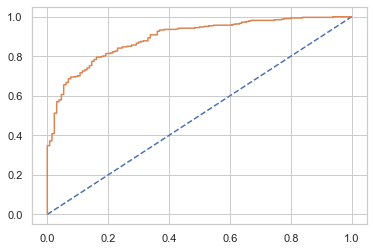

In [111]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Ada Boost

In [112]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [113]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8434864104967198
[[236  96]
 [ 71 664]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



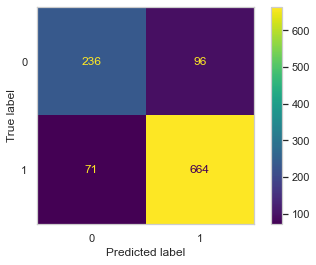

In [114]:
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.grid(False)

AUC: 0.911


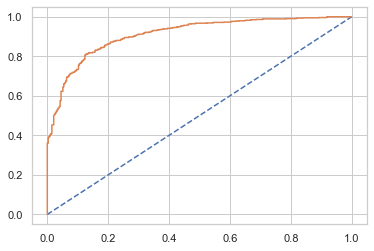

In [115]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [116]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8296943231441049
[[ 89  41]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       130
           1       0.88      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



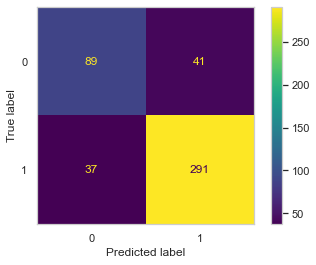

In [117]:
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.grid(False)

AUC: 0.911


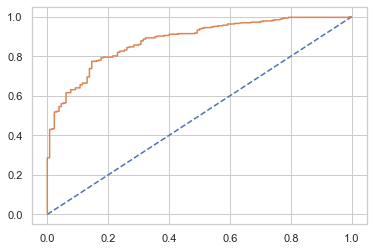

In [118]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [119]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [120]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [121]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7441424554826617
Accuracy on test set :  0.7751091703056768
Recall on training set :  0.9795918367346939
Recall on test set :  0.9725609756097561
Precision on training set :  0.7361963190184049
Precision on test set :  0.7723970944309927


In [122]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

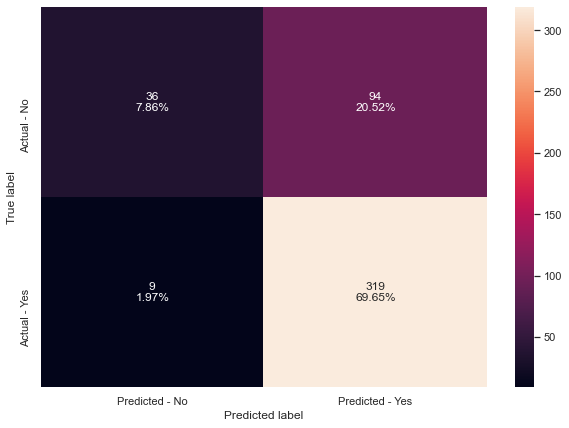

In [123]:
make_confusion_matrix(abc_tuned,y_test)

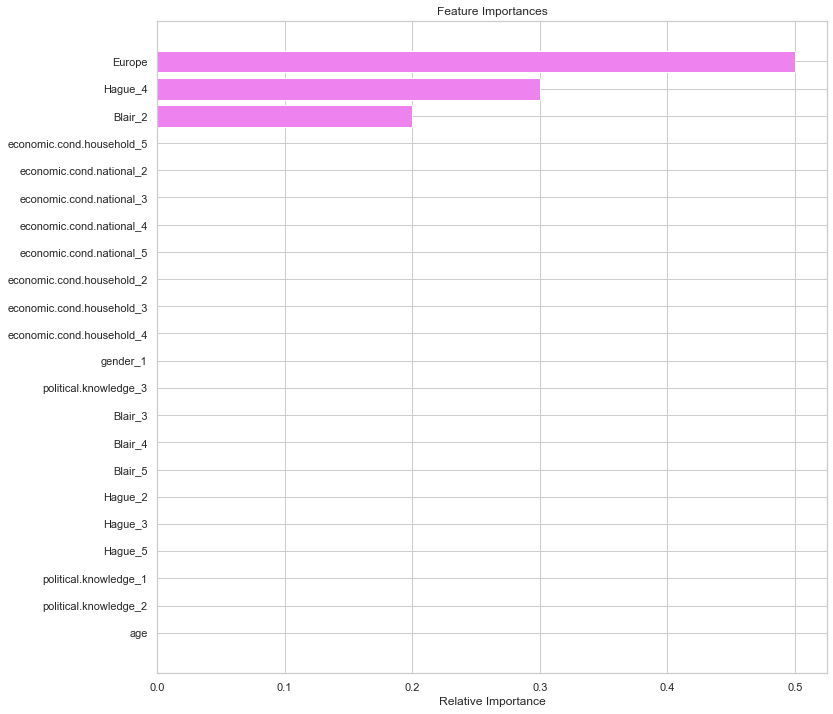

In [124]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [125]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [126]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8809746954076851
Accuracy on test set :  0.8187772925764192
Recall on training set :  0.9306122448979591
Recall on test set :  0.8536585365853658
Precision on training set :  0.9
Precision on test set :  0.8888888888888888


In [127]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=150, random_state=1,
                           subsample=0.9)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8575445173383318
Accuracy on test set :  0.8318777292576419
Recall on training set :  0.9156462585034013
Recall on test set :  0.8780487804878049
Precision on training set :  0.8820445609436435
Precision on test set :  0.8861538461538462


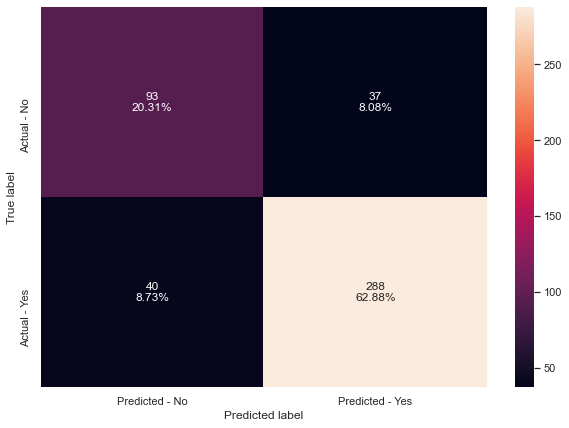

In [129]:
make_confusion_matrix(gbc_tuned,y_test)

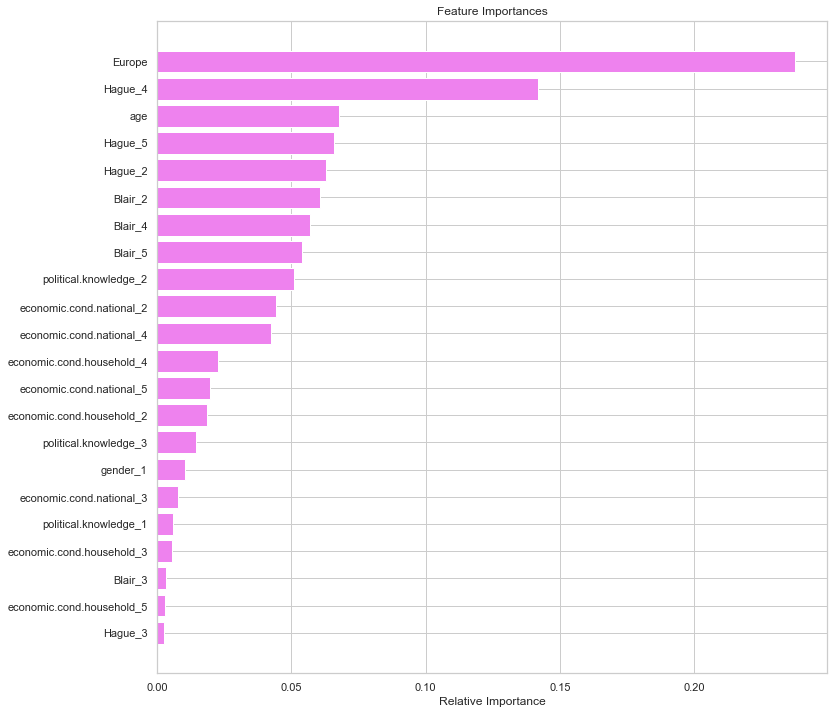

In [130]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

## Comparing all models

# defining list of models
models = [ADB_model, abc_tuned, gbcl, gbc_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [131]:
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import random
import string # this is used for string manipulations

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt1941 = inaugural.raw('1941-Roosevelt.txt')
Kennedy1961 = inaugural.raw('1961-Kennedy.txt')
Nixon1973 = inaugural.raw('1973-Nixon.txt')



[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\athisya\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [132]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count(Roosevelt1941))

{'On': 1, 'each': 2, 'national': 2, 'day': 4, 'of': 81, 'inauguration': 1, 'since': 1, '1789,': 1, 'the': 104, 'people': 5, 'have': 9, 'renewed': 1, 'their': 3, 'sense': 2, 'dedication': 1, 'to': 35, 'United': 3, 'States.': 3, 'In': 5, "Washington's": 1, 'task': 3, 'was': 7, 'create': 2, 'and': 41, 'weld': 1, 'together': 2, 'a': 28, 'nation.': 1, "Lincoln's": 1, 'preserve': 1, 'that': 21, 'Nation': 4, 'from': 8, 'disruption': 2, 'within.': 1, 'this': 11, 'is': 24, 'save': 1, 'its': 9, 'institutions': 1, 'without.': 1, 'To': 1, 'us': 8, 'there': 2, 'has': 10, 'come': 2, 'time,': 1, 'in': 30, 'midst': 2, 'swift': 1, 'happenings,': 1, 'pause': 1, 'for': 6, 'moment': 1, 'take': 1, 'stock': 2, '--': 22, 'recall': 1, 'what': 4, 'our': 14, 'place': 1, 'history': 1, 'been,': 1, 'rediscover': 1, 'we': 22, 'are': 7, 'may': 2, 'be.': 1, 'If': 2, 'do': 2, 'not,': 1, 'risk': 1, 'real': 1, 'peril': 1, 'inaction.': 1, 'Lives': 1, 'nations': 3, 'determined': 1, 'not': 10, 'by': 8, 'count': 1, 'years,'

In [133]:
Roosevelt1941

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [134]:
sentence=Roosevelt1941
l=sentence.split()
print('words:',len(l))
print('characters:',len(Roosevelt1941))
print('sentences:', Roosevelt1941.count('.\n'))

words: 1360
characters: 7571
sentences: 37


In [135]:

sentence=Kennedy1961
l=sentence.split()
print('words:',len(l))
print('characters:',len(Kennedy1961))
print('sentences:', Kennedy1961.count('.\n'))

words: 1390
characters: 7618
sentences: 25


In [136]:


sentence=Nixon1973
l=sentence.split()
print('words:',len(l))
print('characters:',len(Nixon1973))
print('sentences:', Nixon1973.count('.\n'))

words: 1819
characters: 9991
sentences: 47


In [137]:
nltk.FreqDist(inaugural.words()).most_common(10)

[('the', 9446),
 ('of', 7087),
 (',', 7045),
 ('and', 5146),
 ('.', 4856),
 ('to', 4414),
 ('in', 2561),
 ('a', 2184),
 ('our', 2021),
 ('that', 1748)]

In [138]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words()) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]


In [139]:
word_features[0:15] # looking at first 5 word_features

['government',
 'people',
 'us',
 'upon',
 'must',
 '--',
 'great',
 'may',
 'world',
 'states',
 'country',
 'nation',
 'shall',
 'every',
 'one']

In [140]:
    from nltk.corpus import inaugural
    wordlist = inaugural.words()

In [141]:
len(wordlist)

149797

In [142]:
#file = Roosevelt1941

number_of_lines = 0
number_of_words = 0
number_of_characters = 0

for line in Roosevelt1941:

  line = line.strip("\n")

#won't count \n as character

  words = line.split()

  number_of_lines += 1

  number_of_words += len(words)

  number_of_characters += len(line)


#file.close()


print(" Roosevelt inaugural speech : lines:", number_of_lines, "words:", number_of_words, "characters:", number_of_characters)

 Roosevelt inaugural speech : lines: 7571 words: 6174 characters: 7496


In [143]:
#file = Roosevelt1941

number_of_lines = 0
number_of_words = 0
number_of_characters = 0

for line in Kennedy1961:

  line = line.strip("\n")

#won't count \n as character

  words = line.split()

  number_of_lines += 1

  number_of_words += len(words)

  number_of_characters += len(line)


#file.close()


print(" Kennedy inaugural speech : lines:", number_of_lines, "words:", number_of_words, "characters:", number_of_characters)

 Kennedy inaugural speech : lines: 7618 words: 6202 characters: 7565


In [144]:
#file = Roosevelt1941

number_of_lines = 0
number_of_words = 0
number_of_characters = 0

for line in Nixon1973:

  line = line.strip("\n")

#won't count \n as character

  words = line.split()

  number_of_lines += 1

  number_of_words += len(words)

  number_of_characters += len(line)


#file.close()


print(" Nixon inaugural speech : lines:", number_of_lines, "words:", number_of_words, "characters:", number_of_characters)

 Nixon inaugural speech : lines: 9991 words: 8122 characters: 9890


2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [145]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#example_sent = """This is a sample sentence,
#showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Roosevelt1941)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


print(" No.of words in Roosevelt inaugural speech before Removing stop words: ", len(word_tokens))
print(" No.of words in Roosevelt inaugural speech after Removing stop words: ", len(filtered_sentence))
print(filtered_sentence[0:14])

 No.of words in Roosevelt inaugural speech before Removing stop words:  1526
 No.of words in Roosevelt inaugural speech after Removing stop words:  871
['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.']


In [146]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#example_sent = """This is a sample sentence,
#showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Kennedy1961)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


print(" No.of words in Kennedy inaugural speech before Removing stop words: ", len(word_tokens))
print(" No.of words in Kennedy inaugural speech after Removing stop words: ", len(filtered_sentence))
print(filtered_sentence[0:47])

 No.of words in Kennedy inaugural speech before Removing stop words:  1543
 No.of words in Kennedy inaugural speech after Removing stop words:  904
['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'observe', 'today', 'victory', 'party', ',', 'celebration', 'freedom', '--', 'symbolizing', 'end', ',', 'well', 'beginning', '--', 'signifying', 'renewal', ',', 'well', 'change', '.']


In [147]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#example_sent = """This is a sample sentence,
#showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Nixon1973)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


print(" No.of words in Nixon inaugural speech before Removing stop words: ", len(word_tokens))
print(" No.of words in Nixon inaugural speech after Removing stop words: ", len(filtered_sentence))
print(filtered_sentence[0:45])

 No.of words in Nixon inaugural speech before Removing stop words:  2006
 No.of words in Nixon inaugural speech after Removing stop words:  1094
['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', ':', 'When', 'met', 'four', 'years', 'ago', ',', 'America', 'bleak', 'spirit', ',', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', '.']


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [148]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
from nltk.tokenize import RegexpTokenizer

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)



# Extracting the  most common 3 words after the list of words have been converted to lowercase and removing stopwords 
word_features = [item[0] for item in all_words_freq.most_common(4)]
print('word occurs the most number of times in  inaugural address after removing the stopwords ',word_features)


word occurs the most number of times in  inaugural address after removing the stopwords  ['--', 'nation', 'know', 'spirit']


In [149]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
from nltk.tokenize import RegexpTokenizer

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)



# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(4)]
print('word occurs the most number of times in  inaugural address after removing the stopwords ',word_features)

word occurs the most number of times in  inaugural address after removing the stopwords  ['--', 'let', 'us', 'world']


In [150]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
from nltk.tokenize import RegexpTokenizer

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)



# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(3)]
print('word occurs the most number of times in  inaugural address after removing the stopwords ',word_features)

word occurs the most number of times in  inaugural address after removing the stopwords  ['us', 'let', 'america']


In [151]:
dir(inaugural)

['CorpusView',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_encoding',
 '_fileids',
 '_get_root',
 '_para_block_reader',
 '_read_para_block',
 '_read_sent_block',
 '_read_word_block',
 '_root',
 '_sent_tokenizer',
 '_tagset',
 '_unload',
 '_word_tokenizer',
 'abspath',
 'abspaths',
 'citation',
 'encoding',
 'ensure_loaded',
 'fileids',
 'license',
 'open',
 'paras',
 'raw',
 'readme',
 'root',
 'sents',
 'words']

In [152]:

inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [153]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [154]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [155]:

inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [156]:

inaugural.sents('1961-Kennedy.txt')

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [157]:

inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [158]:

inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [159]:

inaugural.sents('1973-Nixon.txt')

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [160]:

inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [161]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosevelt 1941 inaugural address!


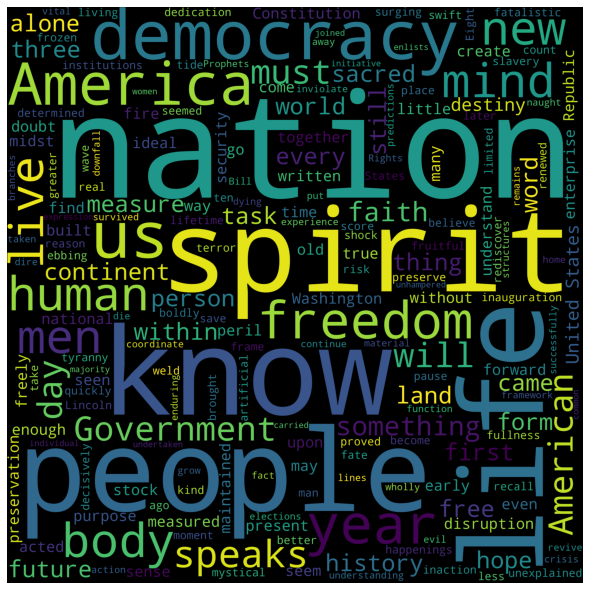

In [162]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Roosevelt1941) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt 1941 inaugural address!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for Kennedy 1961 inaugural address!


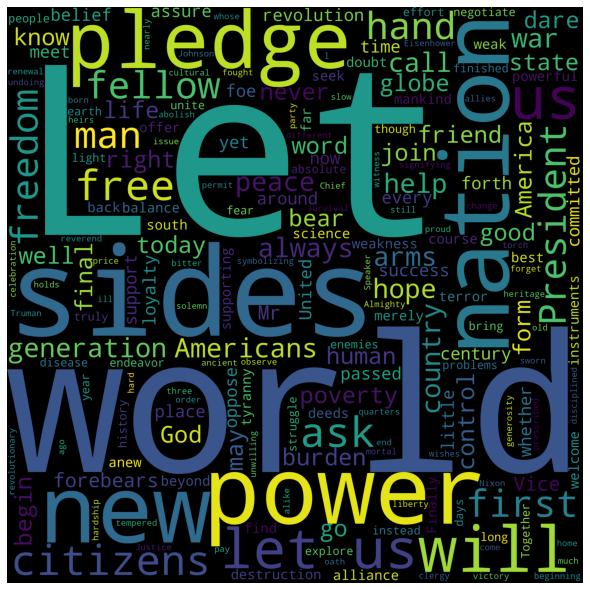

In [163]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Kennedy1961) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy 1961 inaugural address!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for Nixon 1973 inaugural address!


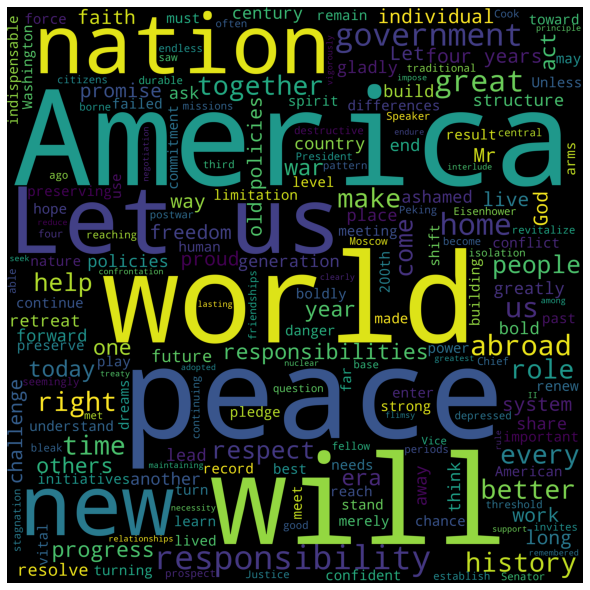

In [164]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Nixon1973) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon 1973 inaugural address!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!